In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml


# Needed to show the plots inline
%matplotlib inline

np.random.seed(seed=2017)

In [3]:
# Load data
digits = load_digits()
print('We have %d samples'%len(digits.target))

We have 1797 samples


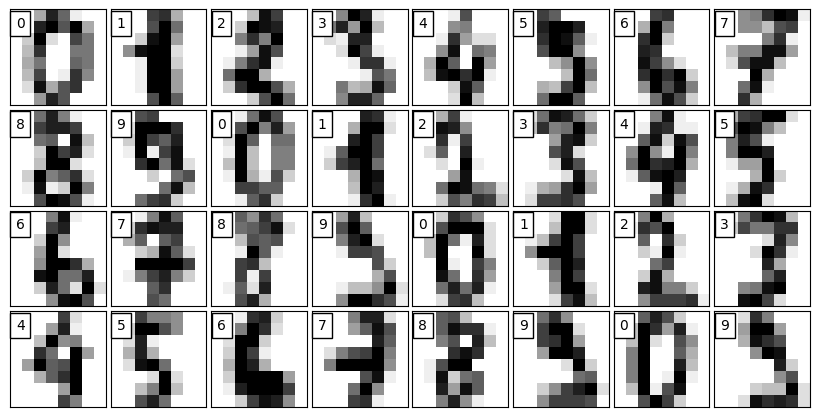

In [4]:
## plot the first 32 samples to get a sense of the data
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(32):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],  cmap=plt.cm.gray_r)
    ax.text(0, 1, str(digits.target[i]), bbox=dict(facecolor='white'))

In [5]:
# split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2017)
print ('Number of samples in training set: %d' %(len(y_train)))
print ('Number of samples in test set: %d' %(len(y_test)))

Number of samples in training set: 1437
Number of samples in test set: 360


In [6]:
# Standardise data, and fit only to the training data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:
# Apply the transformations to the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', max_iter = 100)
# Train the classifier with the traning data
mlp.fit(X_train_scaled,y_train)

/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=100, max_iter=100)

In [9]:
print("Training set score: %f" % mlp.score(X_train_scaled, y_train))
print("Test set score: %f" % mlp.score(X_test_scaled, y_test))

Training set score: 0.990953
Test set score: 0.983333


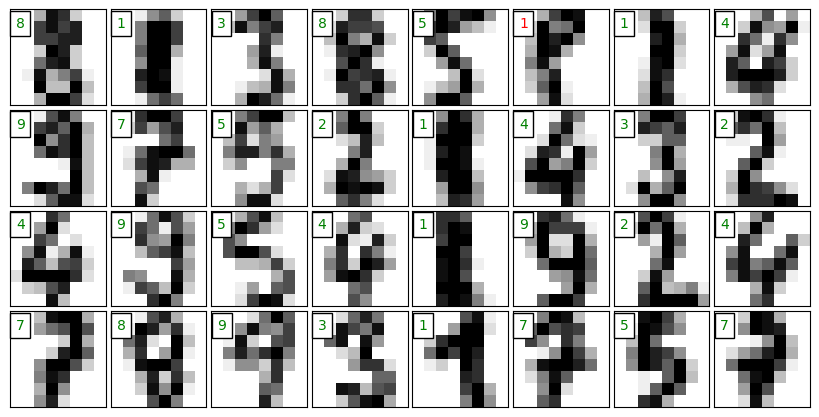

In [10]:
# predict results from the test data
X_test_predicted = mlp.predict(X_test_scaled)

fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(32):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.gray_r)

    # label the image with the target value
    if X_test_predicted[i] == y_test[i]:
        ax.text(0, 1, X_test_predicted[i], color='green', bbox=dict(facecolor='white'))
    else:
        ax.text(0, 1, X_test_predicted[i], color='red', bbox=dict(facecolor='white'))

**MLP on PIMA diabetes data set**

In [15]:
df = pd.read_csv("Data/Diabetes.csv")

X = df.iloc[:,0:8].values
y = df['class'].values     # dependent variables
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Standardazie data, fit only to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

print ("Confusion Matrix: \n", confusion_matrix(y_test,predictions))
print ("Classification Repor: \n", classification_report(y_test,predictions))

Confusion Matrix: 
 [[117  16]
 [ 23  36]]
Classification Repor: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       133
           1       0.69      0.61      0.65        59

    accuracy                           0.80       192
   macro avg       0.76      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**MLP for predicting breat cancer**

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

# 569 data points with 30 features
cancer['data'].shape

X = cancer['data']
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Standardazie data, fit only to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

print ("Confusion Matrix: \n", confusion_matrix(y_test,predictions))
print ("Classification Repor: \n", classification_report(y_test,predictions))

Confusion Matrix: 
 [[51  1]
 [ 0 91]]
Classification Repor: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.99      1.00      0.99        91

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

